In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import datetime
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FormatStrFormatter

EQtime = UTCDateTime("2014-05-24T09:25:02") #Aegean
EQmag  = 6.9 #Aegean
vertical_line_date = pd.to_datetime("2014-05-24")

n_stack= "20"
net1   = "HL"
net2   = "HL"
net3   = "HT"
net4   = "KO"
sta1_  = "SMTH"
sta2_  = "LIA"
sta3_  = "SIGR"
sta4_  = "GELI"


vmin = 1 #3  # minimum direct velocity km/s
dist = 70 #

main_path  = "../AEGEAN/stretching/"

output_dir = main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"
dpi=300

#SMTH_SIGR
#ZZ
ZZinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
#E3
EEinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
#EN
ENinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
#EZ
EZinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
#NN
NNinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
#NE
NEinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
#NZ
NZinput_file1 =main_path+sta1_+"_"+sta3_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net3+"."+sta3_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"

# Get station names from file name
dum1 = os.path.split(ZZinput_file1)[1].split("days_")[0].split("_")
sta_pair1 = str(f"{dum1[0][3:]}-{dum1[1][3:]}")
stack_n1  = f"{dum1[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat1 = np.load(ZZinput_file1, allow_pickle=True)

#retrieve parameters from npy array 1
t1         = ZZdat1["t"]
nwin1      = ZZdat1["nwin"]
tlag1      = ZZdat1["tlag"]
twin1      = ZZdat1["twin"]
tlag_all1  = ZZdat1["tlag_all"]
tref_start_str1 = ZZdat1["tref_start_str"]
tref_end_str1   = ZZdat1["tref_end_str"]
nwin_indx1 = np.where((tlag_all1 <= -np.min(twin1)) & (tlag_all1 > -np.max(twin1)))[0] # negative lag time indices for dvv window
pwin_indx1 = np.where((tlag_all1 >= np.min(twin1)) & (tlag_all1 < np.max(twin1)))[0] # positive lag time indices for dvv window
ZZndata_sym1    = ZZdat1["ndata_sym"]
ZZndata_pos1    = ZZdat1["ndata_pos"]
ZZndata_neg1    = ZZdat1["ndata_neg"]
ZZrefstack_sym1 = ZZdat1["refstack_sym"]

######
ZZsym_lag1    = ZZdat1["sym_lag"]
ZZcc_sym1     = ZZdat1["cc_sym"]

# read data ZE##############################################################################################################
ZEdat1 = np.load(ZEinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
ZEsym_lag1    = ZEdat1["sym_lag"]
ZEcc_sym1     = ZEdat1["cc_sym"]

# read data ZN##############################################################################################################
ZNdat1 = np.load(ZNinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
ZNsym_lag1    = ZNdat1["sym_lag"]
ZNcc_sym1     = ZNdat1["cc_sym"]

# read data EE##############################################################################################################
EEdat1 = np.load(EEinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
EEsym_lag1    = EEdat1["sym_lag"]
EEcc_sym1     = EEdat1["cc_sym"]

# read data EN#################################################################################################
ENdat1 = np.load(ENinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
ENsym_lag1    = ENdat1["sym_lag"]
ENcc_sym1     = ENdat1["cc_sym"]

# read data EZ##############################################################################################################
EZdat1 = np.load(EZinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
EZsym_lag1    = EZdat1["sym_lag"]
EZcc_sym1     = EZdat1["cc_sym"]

# read data NN##############################################################################################################
NNdat1 = np.load(NNinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
NNsym_lag1    = NNdat1["sym_lag"]
NNcc_sym1     = NNdat1["cc_sym"]

# read data NE##############################################################################################################
NEdat1 = np.load(NEinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
NEsym_lag1    = NEdat1["sym_lag"]
NEcc_sym1     = NEdat1["cc_sym"]

# read data NZ##############################################################################################################
NZdat1 = np.load(NZinput_file1, allow_pickle=True)
#retrieve parameters from npy array 1
######
NZsym_lag1    = NZdat1["sym_lag"]
NZcc_sym1     = NZdat1["cc_sym"]

#start_date = pd.to_datetime(min(t)) #FM useful for counting days
#end_date= pd.to_datetime(max(t)) #FM
#date_range = pd.date_range(start=start_date, end=end_date) #FM
#num_days = len(date_range) #FM

#LIA_SMTH
#ZZ
ZZinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
#E3
EEinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
#EN
ENinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
#EZ
EZinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
#NN
NNinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
#NE
NEinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
#NZ
NZinput_file2 =main_path+sta2_+"_"+sta1_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"

# Get station names from file name
dum2 = os.path.split(ZZinput_file2)[1].split("days_")[0].split("_")
sta_pair2 = str(f"{dum2[0][3:]}-{dum2[1][3:]}")
stack_n2  = f"{dum2[6]}"
#print(f"Station pair: {sta_pair} - {stack_n}")

# read data ZZ#########################################################################################################
ZZdat2 = np.load(ZZinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
t2         = ZZdat2["t"]
nwin2      = ZZdat2["nwin"]
tlag2      = ZZdat2["tlag"]
twin2      = ZZdat2["twin"]
tlag_all2  = ZZdat2["tlag_all"]
tref_start_str2 = ZZdat2["tref_start_str"]
tref_end_str2   = ZZdat2["tref_end_str"]
nwin_indx2 = np.where((tlag_all2 <= -np.min(twin2)) & (tlag_all2 > -np.max(twin2)))[0] # negative lag time indices for dvv window
pwin_indx2 = np.where((tlag_all2 >= np.min(twin2)) & (tlag_all2 < np.max(twin2)))[0] # positive lag time indices for dvv window
ZZndata_sym2    = ZZdat2["ndata_sym"]
ZZndata_pos2    = ZZdat2["ndata_pos"]
ZZndata_neg2    = ZZdat2["ndata_neg"]
ZZrefstack_sym2 = ZZdat2["refstack_sym"]

######
ZZsym_lag2    = ZZdat2["sym_lag"]
ZZcc_sym2     = ZZdat2["cc_sym"]

# read data ZE#################################################################################################
ZEdat2 = np.load(ZEinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
ZEsym_lag2    = ZEdat2["sym_lag"]
ZEcc_sym2     = ZEdat2["cc_sym"]

# read data ZN#################################################################################################
ZNdat2 = np.load(ZNinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
ZNsym_lag2    = ZNdat2["sym_lag"]
ZNcc_sym2     = ZNdat2["cc_sym"]

# read data EE#################################################################################################
EEdat2 = np.load(EEinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
EEsym_lag2    = EEdat2["sym_lag"]
EEcc_sym2     = EEdat2["cc_sym"]

# read data EN#################################################################################################
ENdat2 = np.load(ENinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
ENsym_lag2    = ENdat2["sym_lag"]
ENcc_sym2     = ENdat2["cc_sym"]

# read data EZ##############################################################################################################
EZdat2 = np.load(EZinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
EZsym_lag2    = EZdat2["sym_lag"]
EZcc_sym2     = EZdat2["cc_sym"]

# read data NN#################################################################################################
NNdat2 = np.load(NNinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
NNsym_lag2    = NNdat2["sym_lag"]
NNcc_sym2     = NNdat2["cc_sym"]

# read data NE#################################################################################################
NEdat2 = np.load(NEinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
NEsym_lag2    = NEdat2["sym_lag"]
NEcc_sym2     = NEdat2["cc_sym"]

# read data NZ##############################################################################################################
NZdat2 = np.load(NZinput_file2, allow_pickle=True)
#retrieve parameters from npy array 2
######
NZsym_lag2    = NZdat2["sym_lag"]
NZcc_sym2     = NZdat2["cc_sym"]

#LIA_SIGR
#ZZ
ZZinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
#E3
EEinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
#EN
ENinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
#EZ
EZinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
#NN
NNinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
#NE
NEinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
#NZ
NZinput_file3 =main_path+sta2_+"_"+sta3_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net3+"."+sta3_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"

###################
# Get station names from file name
dum3 = os.path.split(ZZinput_file3)[1].split("days_")[0].split("_")
sta_pair3 = str(f"{dum3[0][3:]}-{dum3[1][3:]}")
stack_n3  = f"{dum3[6]}"

# read data ZZ#########################################################################################################
ZZdat3 = np.load(ZZinput_file3, allow_pickle=True)
#retrieve parameters from npy array 1
t3         = ZZdat3["t"]
######
ZZsym_lag3    = ZZdat3["sym_lag"]
ZZcc_sym3     = ZZdat3["cc_sym"]

# read data ZE##############################################################################################################
ZEdat3 = np.load(ZEinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
ZEsym_lag3    = ZEdat3["sym_lag"]
ZEcc_sym3     = ZEdat3["cc_sym"]

# read data ZN##############################################################################################################
ZNdat3 = np.load(ZNinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
ZNsym_lag3    = ZNdat3["sym_lag"]
ZNcc_sym3     = ZNdat3["cc_sym"]

# read data EE##############################################################################################################
EEdat3 = np.load(EEinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
EEsym_lag3    = EEdat3["sym_lag"]
EEcc_sym3     = EEdat3["cc_sym"]

# read data EN#################################################################################################
ENdat3 = np.load(ENinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
ENsym_lag3    = ENdat3["sym_lag"]
ENcc_sym3     = ENdat3["cc_sym"]

# read data EZ##############################################################################################################
EZdat3 = np.load(EZinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
EZsym_lag3    = EZdat3["sym_lag"]
EZcc_sym3     = EZdat3["cc_sym"]

# read data NN##############################################################################################################
NNdat3 = np.load(NNinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
NNsym_lag3    = NNdat3["sym_lag"]
NNcc_sym3     = NNdat3["cc_sym"]

# read data NE##############################################################################################################
NEdat3 = np.load(NEinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
NEsym_lag3    = NEdat3["sym_lag"]
NEcc_sym3     = NEdat3["cc_sym"]

# read data NZ##############################################################################################################
NZdat3 = np.load(NZinput_file3, allow_pickle=True)
#retrieve parameters from npy array 3
######
NZsym_lag3    = NZdat3["sym_lag"]
NZcc_sym3     = NZdat3["cc_sym"]
###################

#SIGR_GELI
#ZZ
ZZinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
#E3
EEinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
#EN
ENinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
#EZ
EZinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
#NN
NNinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
#NE
NEinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
#NZ
NZinput_file4 =main_path+sta3_+"_"+sta4_+"/"+n_stack+"days_stack/"+net3+"."+sta3_+"_"+net4+"."+sta4_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"


###################
# Get station names from file name
dum4 = os.path.split(ZZinput_file4)[1].split("days_")[0].split("_")
sta_pair4 = str(f"{dum4[0][3:]}-{dum4[1][3:]}")
stack_n4  = f"{dum4[6]}"

# read data ZZ#########################################################################################################
ZZdat4 = np.load(ZZinput_file4, allow_pickle=True)
#retrieve parameters from npy array 1
t4         = ZZdat4["t"]
######
ZZsym_lag4    = ZZdat4["sym_lag"]
ZZcc_sym4     = ZZdat4["cc_sym"]

# read data ZE##############################################################################################################
ZEdat4 = np.load(ZEinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
ZEsym_lag4    = ZEdat4["sym_lag"]
ZEcc_sym4     = ZEdat4["cc_sym"]

# read data ZN##############################################################################################################
ZNdat4 = np.load(ZNinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
ZNsym_lag4    = ZNdat4["sym_lag"]
ZNcc_sym4     = ZNdat4["cc_sym"]

# read data EE##############################################################################################################
EEdat4 = np.load(EEinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
EEsym_lag4    = EEdat4["sym_lag"]
EEcc_sym4     = EEdat4["cc_sym"]

# read data EN#################################################################################################
ENdat4 = np.load(ENinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
ENsym_lag4    = ENdat4["sym_lag"]
ENcc_sym4     = ENdat4["cc_sym"]

# read data EZ##############################################################################################################
EZdat4 = np.load(EZinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
EZsym_lag4    = EZdat4["sym_lag"]
EZcc_sym4     = EZdat4["cc_sym"]

# read data NN##############################################################################################################
NNdat4 = np.load(NNinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
NNsym_lag4    = NNdat4["sym_lag"]
NNcc_sym4     = NNdat4["cc_sym"]

# read data NE##############################################################################################################
NEdat4 = np.load(NEinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
NEsym_lag4    = NEdat4["sym_lag"]
NEcc_sym4     = NEdat4["cc_sym"]

# read data NZ##############################################################################################################
NZdat4 = np.load(NZinput_file4, allow_pickle=True)
#retrieve parameters from npy array 4
######
NZsym_lag4    = NZdat4["sym_lag"]
NZcc_sym4     = NZdat4["cc_sym"]
###################


#SMTH_GELI
#ZZ
ZZinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
#E3
EEinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
#EN
ENinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
#EZ
EZinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
#NN
NNinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
#NE
NEinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
#NZ
NZinput_file5 =main_path+sta1_+"_"+sta4_+"/"+n_stack+"days_stack/"+net1+"."+sta1_+"_"+net4+"."+sta4_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"

###################
# Get station names from file name
dum5 = os.path.split(ZZinput_file5)[1].split("days_")[0].split("_")
sta_pair5 = str(f"{dum5[0][3:]}-{dum5[1][3:]}")
stack_n5  = f"{dum5[6]}"

###################
# Get station names from file name
dum5 = os.path.split(ZZinput_file5)[1].split("days_")[0].split("_")
sta_pair5 = str(f"{dum5[0][3:]}-{dum5[1][3:]}")
stack_n5  = f"{dum5[6]}"

# read data ZZ#########################################################################################################
ZZdat5 = np.load(ZZinput_file5, allow_pickle=True)
#retrieve parameters from npy array 1
t5         = ZZdat5["t"]
######
ZZsym_lag5    = ZZdat5["sym_lag"]
ZZcc_sym5     = ZZdat5["cc_sym"]

# read data ZE##############################################################################################################
ZEdat5 = np.load(ZEinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
ZEsym_lag5    = ZEdat5["sym_lag"]
ZEcc_sym5     = ZEdat5["cc_sym"]

# read data ZN##############################################################################################################
ZNdat5 = np.load(ZNinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
ZNsym_lag5    = ZNdat5["sym_lag"]
ZNcc_sym5     = ZNdat5["cc_sym"]

# read data EE##############################################################################################################
EEdat5 = np.load(EEinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
EEsym_lag5    = EEdat5["sym_lag"]
EEcc_sym5     = EEdat5["cc_sym"]

# read data EN#################################################################################################
ENdat5 = np.load(ENinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
ENsym_lag5    = ENdat5["sym_lag"]
ENcc_sym5     = ENdat5["cc_sym"]

# read data EZ##############################################################################################################
EZdat5 = np.load(EZinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
EZsym_lag5    = EZdat5["sym_lag"]
EZcc_sym5     = EZdat5["cc_sym"]

# read data NN##############################################################################################################
NNdat5 = np.load(NNinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
NNsym_lag5    = NNdat5["sym_lag"]
NNcc_sym5     = NNdat5["cc_sym"]

# read data NE##############################################################################################################
NEdat5 = np.load(NEinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
NEsym_lag5    = NEdat5["sym_lag"]
NEcc_sym5     = NEdat5["cc_sym"]

# read data NZ##############################################################################################################
NZdat5 = np.load(NZinput_file5, allow_pickle=True)
#retrieve parameters from npy array 5
######
NZsym_lag5    = NZdat5["sym_lag"]
NZcc_sym5     = NZdat5["cc_sym"]
###################

#LIA_GELI
#ZZ
ZZinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
#ZE                                                                                                                              
ZEinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
#ZN
ZNinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
#E3
EEinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
#EN
ENinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
#EZ
EZinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
#NN
NNinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
#NE
NEinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
#NZ
NZinput_file6 =main_path+sta2_+"_"+sta4_+"/"+n_stack+"days_stack/"+net2+"."+sta2_+"_"+net4+"."+sta4_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"

###################
# Get station names from file name
dum6 = os.path.split(ZZinput_file6)[1].split("days_")[0].split("_")
sta_pair6 = str(f"{dum6[0][3:]}-{dum6[1][3:]}")
stack_n6  = f"{dum6[6]}"

###################
# Get station names from file name
dum6 = os.path.split(ZZinput_file6)[1].split("days_")[0].split("_")
sta_pair6 = str(f"{dum6[0][3:]}-{dum6[1][3:]}")
stack_n6  = f"{dum6[6]}"

# read data ZZ#########################################################################################################
ZZdat6 = np.load(ZZinput_file6, allow_pickle=True)
#retrieve parameters from npy array 1
t6         = ZZdat6["t"]
######
ZZsym_lag6    = ZZdat6["sym_lag"]
ZZcc_sym6     = ZZdat6["cc_sym"]

# read data ZE##############################################################################################################
ZEdat6 = np.load(ZEinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
ZEsym_lag6    = ZEdat6["sym_lag"]
ZEcc_sym6     = ZEdat6["cc_sym"]

# read data ZN##############################################################################################################
ZNdat6 = np.load(ZNinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
ZNsym_lag6    = ZNdat6["sym_lag"]
ZNcc_sym6     = ZNdat6["cc_sym"]

# read data EE##############################################################################################################
EEdat6 = np.load(EEinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
EEsym_lag6    = EEdat6["sym_lag"]
EEcc_sym6     = EEdat6["cc_sym"]

# read data EN#################################################################################################
ENdat6 = np.load(ENinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
ENsym_lag6    = ENdat6["sym_lag"]
ENcc_sym6     = ENdat6["cc_sym"]

# read data EZ##############################################################################################################
EZdat6 = np.load(EZinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
EZsym_lag6    = EZdat6["sym_lag"]
EZcc_sym6     = EZdat6["cc_sym"]

# read data NN##############################################################################################################
NNdat6 = np.load(NNinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
NNsym_lag6    = NNdat6["sym_lag"]
NNcc_sym6     = NNdat6["cc_sym"]

# read data NE##############################################################################################################
NEdat6 = np.load(NEinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
NEsym_lag6    = NEdat6["sym_lag"]
NEcc_sym6     = NEdat6["cc_sym"]

# read data NZ##############################################################################################################
NZdat6 = np.load(NZinput_file6, allow_pickle=True)
#retrieve parameters from npy array 6
######
NZsym_lag6    = NZdat6["sym_lag"]
NZcc_sym6     = NZdat6["cc_sym"]
###################

start_date = pd.to_datetime(min(t1)) #FM useful for counting days
end_date= pd.to_datetime(max(t1)) #FM
date_range = pd.date_range(start=start_date, end=end_date) #FM
num_days = len(date_range) #FM

../AEGEAN/stretching/LIA_SMTH/20days_stack/interferogram_symlag_LIA_SMTH.pdf


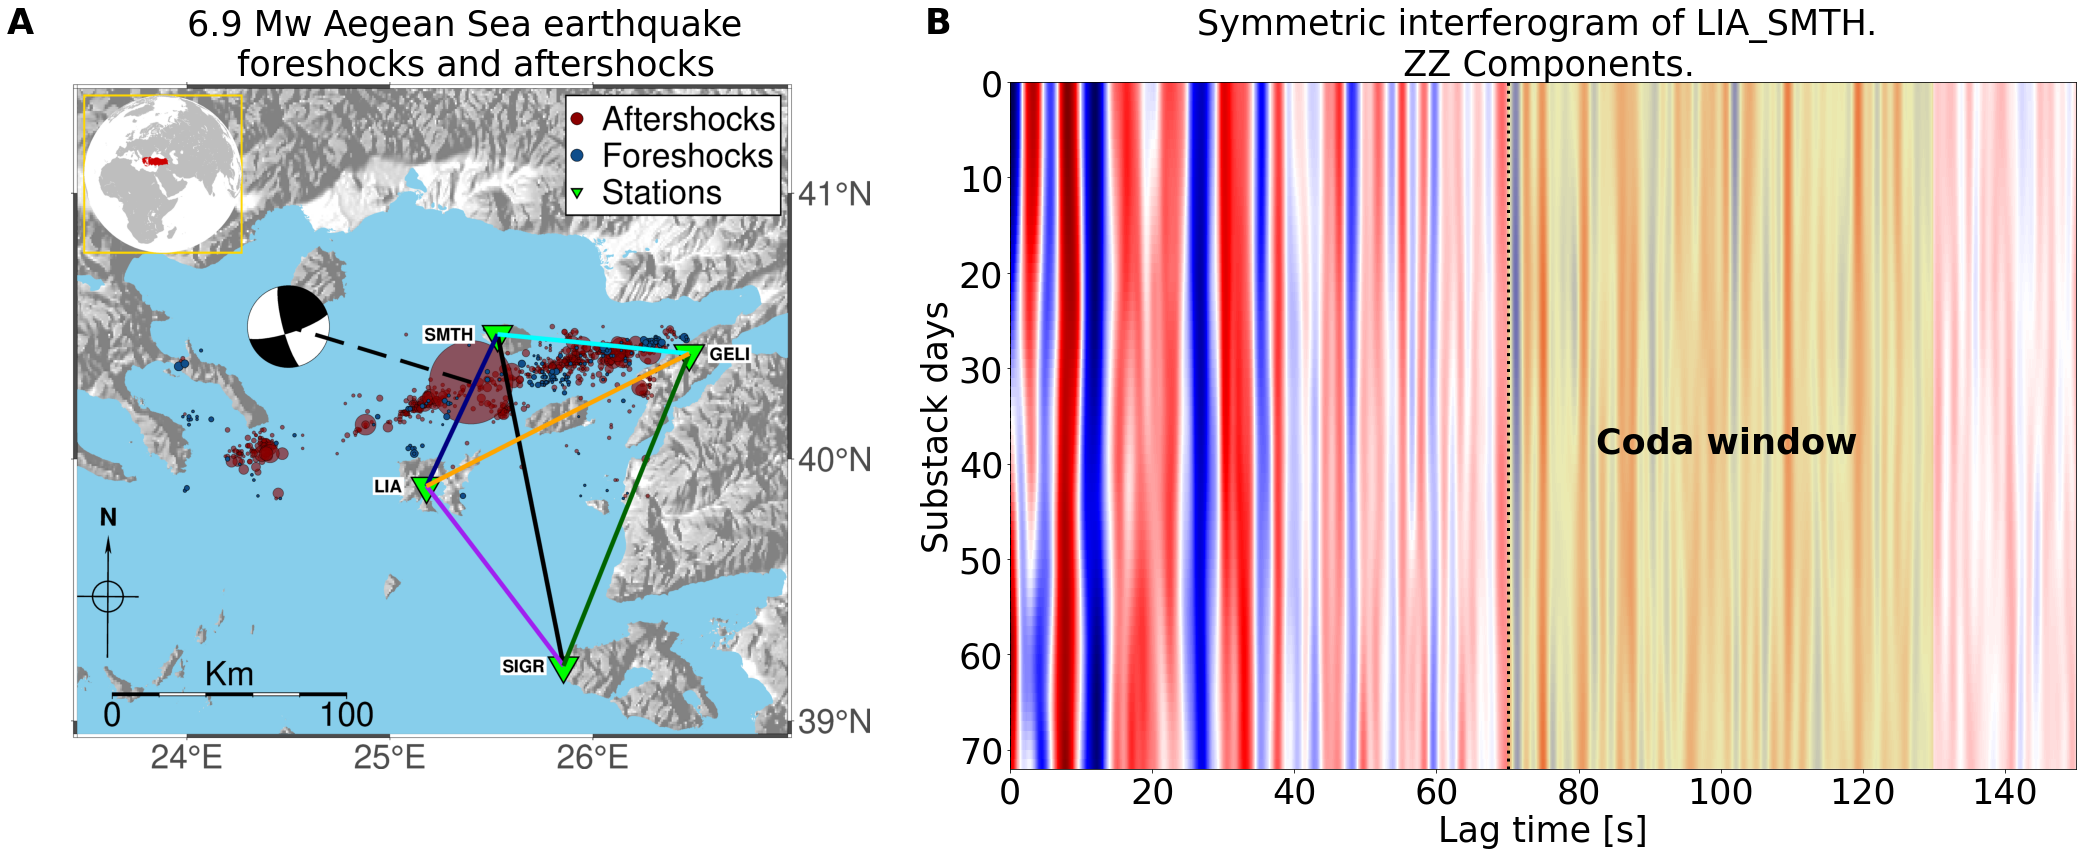

In [2]:
from matplotlib.backends.backend_pdf import PdfPages


# Import a PDF image into the fourth subplot
image = plt.imread('FIGS/Aegean_fore_after.png')

## creating grid for subplots
fig = plt.figure()
fig.set_figheight(12) #(12)
fig.set_figwidth(30) #(30)

ax7 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), rowspan=2)
ax0 = plt.subplot2grid(shape=(2, 2), loc=(0, 1), rowspan=2)

ax7.imshow(image, aspect='equal')
ax7.set_title("6.9 Mw Aegean Sea earthquake \n foreshocks and aftershocks", size=35, color="k")
ax7.set_axis_off()
ax7.text(-0.08, 1.11, 'A', transform=ax7.transAxes, fontsize=35, fontweight='bold', va='top', color="k")
#####################

#ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(ZZndata_sym2,cmap='seismic',extent=[tlag2[0],tlag2[-1],nwin2,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
ax0.set_xlabel("Lag time [s]", size=35, color="k")
ax0.set_ylabel(f"Substack days", size=35) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta2_}_{sta1_}. \n ZZ Components.", size=35)
ax0.tick_params(axis='y', labelcolor='black', labelsize='35')
ax0.tick_params(axis='x', labelcolor='black', labelsize='35')
ax0.plot([0,0],[0,nwin2],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag2 >= np.min(twin2)) & (tlag2 < np.max(twin2)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag2[pwin_indx],np.flip(tlag2[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx2))*0,np.ones(len(nwin_indx2))*nwin2),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.11, 'B', transform=ax0.transAxes, fontsize=35, fontweight='bold', va='top')
ax0.text(0.55, 0.5, 'Coda window', transform=ax0.transAxes, fontsize=35, fontweight='bold', va='top')

#####################


output_file = os.path.join(output_dir, f"interferogram_symlag_{sta2_}_{sta1_}.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.tight_layout()
plt.show()
plt.close()

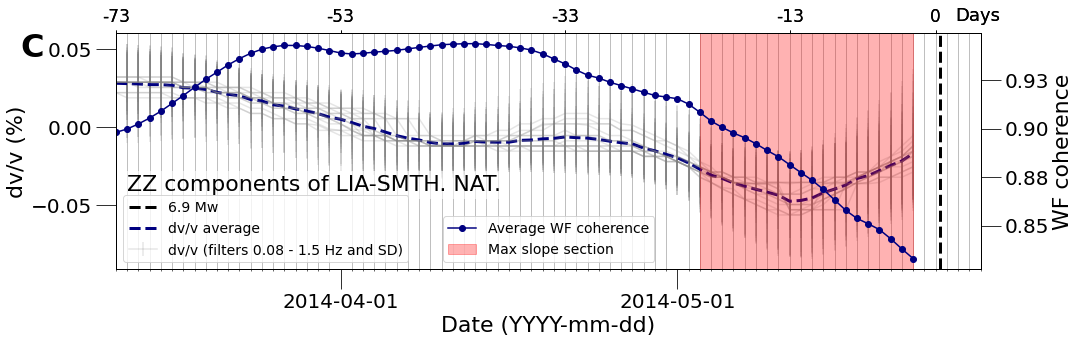

In [3]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FuncFormatter

fold_n = n_stack+"days_stack/"
#ZZ
ZZinput_fileA =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
ZZinput_fileB =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.08_0.7_"+n_stack+"days_dat.npz"
ZZinput_fileC =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.08_0.8_"+n_stack+"days_dat.npz"
ZZinput_fileD =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.08_0.9_"+n_stack+"days_dat.npz"
ZZinput_fileE =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.08_1.0_"+n_stack+"days_dat.npz"
ZZinput_fileF =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.1_0.6_"+n_stack+"days_dat.npz"
ZZinput_fileG =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.1_0.7_"+n_stack+"days_dat.npz"
ZZinput_fileH =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.1_0.8_"+n_stack+"days_dat.npz"
ZZinput_fileI =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.1_0.9_"+n_stack+"days_dat.npz"
ZZinput_fileJ =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.1_1.0_"+n_stack+"days_dat.npz"
ZZinput_fileK =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.05_0.6_"+n_stack+"days_dat.npz"
ZZinput_fileL =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.05_0.7_"+n_stack+"days_dat.npz"
ZZinput_fileM =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.05_0.8_"+n_stack+"days_dat.npz"
ZZinput_fileN =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.05_0.9_"+n_stack+"days_dat.npz"
ZZinput_fileO =main_path+sta2_+"_"+sta1_+"/"+fold_n+net2+"."+sta2_+"_"+net1+"."+sta1_+"_comp_ZZ_0.05_1.0_"+n_stack+"days_dat.npz"

# read data ZZ#########################################################################################################
ZZdatA = np.load(ZZinput_fileA, allow_pickle=True)
ZZdatB = np.load(ZZinput_fileB, allow_pickle=True)
ZZdatC = np.load(ZZinput_fileC, allow_pickle=True)
ZZdatD = np.load(ZZinput_fileD, allow_pickle=True)
ZZdatE = np.load(ZZinput_fileE, allow_pickle=True)
ZZdatF = np.load(ZZinput_fileF, allow_pickle=True)
ZZdatG = np.load(ZZinput_fileG, allow_pickle=True)
ZZdatH = np.load(ZZinput_fileH, allow_pickle=True)
ZZdatI = np.load(ZZinput_fileI, allow_pickle=True)
ZZdatJ = np.load(ZZinput_fileJ, allow_pickle=True)
ZZdatK = np.load(ZZinput_fileK, allow_pickle=True)
ZZdatL = np.load(ZZinput_fileL, allow_pickle=True)
ZZdatM = np.load(ZZinput_fileM, allow_pickle=True)
ZZdatN = np.load(ZZinput_fileN, allow_pickle=True)
ZZdatO = np.load(ZZinput_fileO, allow_pickle=True)

#retrieve parameters from npy array A
tZZ           = ZZdatA["t"]
ZZsym_lagA    = ZZdatA["sym_lag"]
ZZsd_sym_lagA = ZZdatA["sd_sym_lag"]
ZZcc_symA     = ZZdatA["cc_sym"]

#retrieve parameters from npy array B
ZZsym_lagB    = ZZdatB["sym_lag"]
ZZsd_sym_lagB = ZZdatB["sd_sym_lag"]
ZZcc_symB     = ZZdatB["cc_sym"]
#retrieve parameters from npy array C
ZZsym_lagC    = ZZdatC["sym_lag"]
ZZsd_sym_lagC = ZZdatC["sd_sym_lag"]
ZZcc_symC     = ZZdatC["cc_sym"]
#retrieve parameters from npy array D
ZZsym_lagD    = ZZdatD["sym_lag"]
ZZsd_sym_lagD = ZZdatD["sd_sym_lag"]
ZZcc_symD     = ZZdatD["cc_sym"]
#retrieve parameters from npy array E
ZZsym_lagE    = ZZdatE["sym_lag"]
ZZsd_sym_lagE = ZZdatE["sd_sym_lag"]
ZZcc_symE     = ZZdatE["cc_sym"]
#retrieve parameters from npy array F
ZZsym_lagF    = ZZdatF["sym_lag"]
ZZsd_sym_lagF = ZZdatF["sd_sym_lag"]
ZZcc_symF     = ZZdatF["cc_sym"]
#retrieve parameters from npy array G
ZZsym_lagG    = ZZdatG["sym_lag"]
ZZsd_sym_lagG = ZZdatG["sd_sym_lag"]
ZZcc_symG     = ZZdatG["cc_sym"]
#retrieve parameters from npy array H
ZZsym_lagH    = ZZdatH["sym_lag"]
ZZsd_sym_lagH = ZZdatH["sd_sym_lag"]
ZZcc_symH     = ZZdatH["cc_sym"]
#retrieve parameters from npy array I
ZZsym_lagI    = ZZdatI["sym_lag"]
ZZsd_sym_lagI = ZZdatI["sd_sym_lag"]
ZZcc_symI     = ZZdatI["cc_sym"]
#retrieve parameters from npy array J
ZZsym_lagJ    = ZZdatJ["sym_lag"]
ZZsd_sym_lagJ = ZZdatJ["sd_sym_lag"]
ZZcc_symJ     = ZZdatJ["cc_sym"]
#retrieve parameters from npy array K
ZZsym_lagK    = ZZdatK["sym_lag"]
ZZsd_sym_lagK = ZZdatK["sd_sym_lag"]
ZZcc_symK     = ZZdatK["cc_sym"]
#retrieve parameters from npy array L
ZZsym_lagL    = ZZdatL["sym_lag"]
ZZsd_sym_lagL = ZZdatL["sd_sym_lag"]
ZZcc_symL     = ZZdatL["cc_sym"]
#retrieve parameters from npy array M
ZZsym_lagM    = ZZdatM["sym_lag"]
ZZsd_sym_lagM = ZZdatM["sd_sym_lag"]
ZZcc_symM     = ZZdatM["cc_sym"]
#retrieve parameters from npy array N
ZZsym_lagN    = ZZdatN["sym_lag"]
ZZsd_sym_lagN = ZZdatN["sd_sym_lag"]
ZZcc_symN     = ZZdatN["cc_sym"]
#retrieve parameters from npy array O
ZZsym_lagO    = ZZdatO["sym_lag"]
ZZsd_sym_lagO = ZZdatO["sd_sym_lag"]
ZZcc_symO     = ZZdatO["cc_sym"]

#list ALL ZZ data
lst_ZZ_symdata = [ZZsym_lagA, ZZsym_lagB, ZZsym_lagC, ZZsym_lagD, ZZsym_lagE, ZZsym_lagF, ZZsym_lagG, ZZsym_lagH, ZZsym_lagI,\
             ZZsym_lagJ, ZZsym_lagK, ZZsym_lagL, ZZsym_lagM, ZZsym_lagN, ZZsym_lagO]
#calculate average of all the inputs
ZZsd_sym_lag = [ZZsd_sym_lagA, ZZsd_sym_lagB, ZZsd_sym_lagC, ZZsd_sym_lagD, ZZsd_sym_lagE, ZZsd_sym_lagF, ZZsd_sym_lagG, ZZsd_sym_lagH,\
               ZZsd_sym_lagI,ZZsd_sym_lagJ,ZZsd_sym_lagK,ZZsd_sym_lagL,ZZsd_sym_lagM,ZZsd_sym_lagN,ZZsd_sym_lagO]

ZZavg_dvv = np.mean(lst_ZZ_symdata, axis=0)

ZZsd_avg_dvv = np.std(ZZavg_dvv)

ZZavg_cc  = (ZZcc_symA + ZZcc_symB+ ZZcc_symC+ ZZcc_symD+ ZZcc_symE+ ZZcc_symF+ ZZcc_symG+ ZZcc_symH+ ZZcc_symI+ ZZcc_symJ\
             + ZZcc_symK+ ZZcc_symL+ ZZcc_symM+ ZZcc_symN+ ZZcc_symO) / 15

#____
start_dateA = pd.to_datetime(min(tZZ)) #FM useful for counting days
end_dateA= pd.to_datetime(max(tZZ)) #FM
date_rangeA = pd.date_range(start=start_dateA, end=end_dateA) #FM
num_daysA = len(date_rangeA) #FM
#____

####slope starts
avg_cc = pd.Series(ZZavg_cc, index=tZZ)
#avg_cc = pd.DataFrame(ZZavg_cc, index=t)

# Calculate the slopes using a moving window of 20 days
window_size = int(n_stack)
if window_size == 10: window_size = 20
slopes = avg_cc.rolling(window_size).apply(lambda x: (x[-1] - x[0]) / (len(x) - 1), raw=True)

# Find the section where the slope starts to decrease until reaching its lowest value
min_slope_start = 0
min_slope_end = 0
min_slope_value = np.inf

for i in range(len(slopes) - window_size + 1):
    current_section = slopes[i:i + window_size]
    current_min_slope = np.min(current_section)
    
    if current_min_slope < min_slope_value:
        min_slope_value = current_min_slope
        min_slope_start = i
        min_slope_end = i + window_size - 1

###########SLOPE ends

#PLOTS#
plt.figure(figsize=(15,25))
ax4= plt.subplot(612) #311
ax4.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
for i, j in zip(lst_ZZ_symdata, ZZsd_sym_lag):   
    ax4.errorbar(tZZ, i, yerr=j, c="gray", alpha=0.2)
ax4.plot(tZZ, ZZavg_dvv, ls="--", c="navy", linewidth="3")
ax4.text(0.013, 0.40, f"ZZ components of {sta2_}-{sta1_}. NAT.", transform=ax4.transAxes, fontsize=22,\
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax4.tick_params(axis='y', labelcolor='k', labelsize='20')
ax4.tick_params(axis='x', labelcolor='k', labelsize='20')
ax4.set_ylabel("dv/v (%)", size=22)
ax4.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax4.set_xlim(tZZ[0])
ax4.legend([f"{str(EQmag)} Mw", f"dv/v average", f"dv/v (filters 0.08 - 1.5 Hz and SD)"],loc='lower left', fontsize="14")
ax4.text(-0.11, 1.0, 'C', transform=ax4.transAxes, fontsize=32, fontweight='bold', va='top')

# CC after stretching
ax5 = ax4.twinx()
ax5.plot(tZZ, ZZavg_cc, marker="o", c="navy", label="Average WF coherence")
ax5.axvspan(slopes.index[min_slope_start], slopes.index[min_slope_end],\
            color='red', alpha=0.3, label='Max slope section')
ax5.tick_params(axis='y', labelcolor='black', labelsize='20')
ax5.tick_params(axis='x', labelcolor='black', labelsize='14')
ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax5.set_ylabel("WF coherence", size=22)
ax5.set_xlim(tZZ[0])
ax5.legend(loc='lower center', fontsize="14")


for ax in [ax4,ax5]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax6 = ax.twiny()
    ax6.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_beforeA = (date_rangeA - vertical_line_date).days
    ax6_day_numbersA = np.where(days_beforeA >= 0, days_beforeA, days_beforeA ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax6.set_xticks(date_rangeA[::20])
    ax6.set_xticklabels(ax6_day_numbersA[::20], size='17')
    ax6.text(0.97, 1.11, 'Days', transform=ax6.transAxes, fontsize=18, va='top')      
    ax7 = ax.twiny()
    ax7.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax7.set_xticks([vertical_line_date])
    ax7.set_xticklabels(['0'], size='17')

plt.tight_layout(pad=0.7)

plt.show()
plt.close()

../AEGEAN/stretching/LIA_SMTH/20days_stack/Aegean_ALLst_weight.pdf


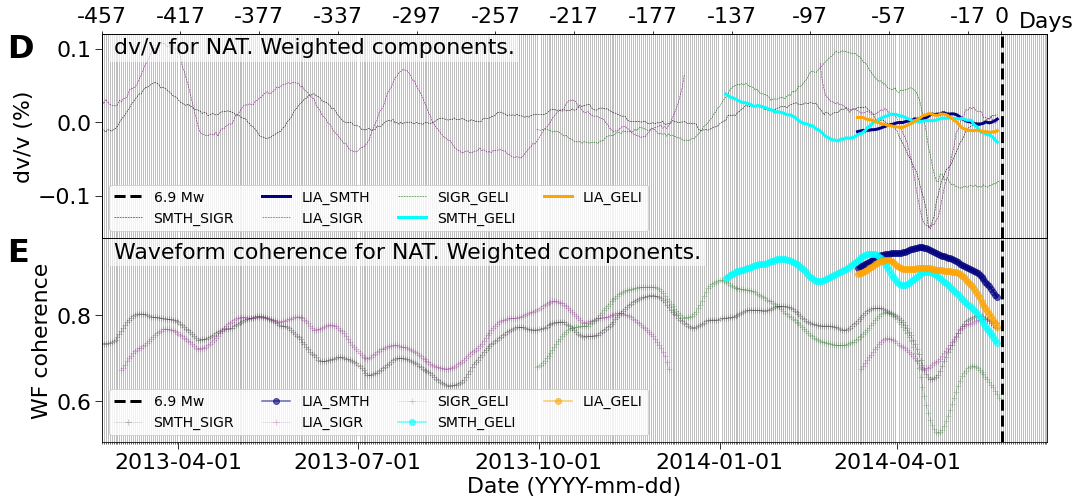

In [4]:
#calculate weighted dv/v average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_results(dvv, cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_dvvs = np.array(dvv)
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between the values of the first group and the values of the second group
    product_sum = np.sum(all_dvvs * (all_cccs**2), axis=0)

    # Calculate the summation of the values of the second group
    all_cccs_sum = np.sum(all_cccs**2, axis=0)

    # Divide the product summation by the summation of the values of the second group
    return product_sum / all_cccs_sum

#calculate weighted waveform cc average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_res(cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between cc^3 and cc^2
    sum_ccc3 = np.sum((all_cccs**3), axis=0)

    # Calculate the summation of the values of the second group
    sum_ccc2 = np.sum((all_cccs**2), axis=0)

    # Divide the product summation by the summation of the values of the second group
    return sum_ccc3 / sum_ccc2

# Define the compos_ for the variables
compos_ = ['ZZ', 'ZE', 'ZN', 'EE', 'EN', 'EZ', 'NN', 'NE', 'NZ']

# Define the number of lists
num_filts = 15

dvv_lists = [[ZZsym_lag1,ZEsym_lag1,ZNsym_lag1,EEsym_lag1,ENsym_lag1,\
            EZsym_lag1,NNsym_lag1,NEsym_lag1,NZsym_lag1]]


cc_c_lists = [[ZZcc_sym1, ZEcc_sym1,ZNcc_sym1,EEcc_sym1,ENcc_sym1,EZcc_sym1,NNcc_sym1,\
             NEcc_sym1,NZcc_sym1]]

########### weighted avg
results = []
for dvv, cc_c in zip(dvv_lists, cc_c_lists):
    results.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg
res_ccc = []
for cc_c in cc_c_lists:
    res_ccc.append(calculate_res(cc_c))
###########

#GAZ_KMRS
#######################2

dvv_lists2 = [[ZZsym_lag2,ZEsym_lag2,ZNsym_lag2,EEsym_lag2,ENsym_lag2,\
            EZsym_lag2,NNsym_lag2,NEsym_lag2,NZsym_lag2]]

cc_c_lists2 = [[ZZcc_sym2, ZEcc_sym2,ZNcc_sym2,EEcc_sym2,ENcc_sym2,EZcc_sym2,NNcc_sym2,\
             NEcc_sym2,NZcc_sym2]]

########### weighted avg2
results2 = []
for dvv, cc_c in zip(dvv_lists2, cc_c_lists2):
    results2.append(calculate_results(dvv, cc_c))
   
    
########### CC waveform avg2
res_ccc2 = []
for cc_c in cc_c_lists2:
    res_ccc2.append(calculate_res(cc_c))
###########
#######################end2


#######################3
dvv_lists3 = [[ZZsym_lag3,ZEsym_lag3,ZNsym_lag3,EEsym_lag3,ENsym_lag3,\
            EZsym_lag3,NNsym_lag3,NEsym_lag3,NZsym_lag3]]


cc_c_lists3 = [[ZZcc_sym3, ZEcc_sym3,ZNcc_sym3,EEcc_sym3,ENcc_sym3,EZcc_sym3,NNcc_sym3,\
             NEcc_sym3,NZcc_sym3]]
########### weighted avg 3
results3 = []
for dvv, cc_c in zip(dvv_lists3, cc_c_lists3):
    results3.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 3
res_ccc3 = []
for cc_c in cc_c_lists3:
    res_ccc3.append(calculate_res(cc_c))
###########
####################### end3

#######################4
#dvv_lists4 = [[ZZsym_lag4,ENsym_lag4,EZsym_lag4,NZsym_lag4, ZEsym_lag4]]

#cc_c_lists4 = [[ZZcc_sym4, ENcc_sym4,EZcc_sym4,NZcc_sym4, ZEcc_sym4]]

dvv_lists4 = [[ZZsym_lag4,ZEsym_lag4,ZNsym_lag4,EEsym_lag4,ENsym_lag4,\
            EZsym_lag4,NNsym_lag4,NEsym_lag4,NZsym_lag4]]

cc_c_lists4 = [[ZZcc_sym4, ZEcc_sym4,ZNcc_sym4,EEcc_sym4,ENcc_sym4,EZcc_sym4,NNcc_sym4,\
             NEcc_sym4,NZcc_sym4]]


########### weighted avg 4
results4 = []
for dvv, cc_c in zip(dvv_lists4, cc_c_lists4):
    results4.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 4
res_ccc4 = []
for cc_c in cc_c_lists4:
    res_ccc4.append(calculate_res(cc_c))
###########
#######################end4


#######################5
dvv_lists5 = [[ZZsym_lag5,ZEsym_lag5,ZNsym_lag5,EEsym_lag5,ENsym_lag5,\
            EZsym_lag5,NNsym_lag5,NEsym_lag5,NZsym_lag5]]


cc_c_lists5 = [[ZZcc_sym5, ZEcc_sym5,ZNcc_sym5,EEcc_sym5,ENcc_sym5,EZcc_sym5,NNcc_sym5,\
             NEcc_sym5,NZcc_sym5]]
########### weighted avg 5
results5 = []
for dvv, cc_c in zip(dvv_lists5, cc_c_lists5):
    results5.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 5
res_ccc5 = []
for cc_c in cc_c_lists5:
    res_ccc5.append(calculate_res(cc_c))
###########
####################### end 5

#######################6
dvv_lists6 = [[ZZsym_lag6,ZEsym_lag6,ZNsym_lag6,EEsym_lag6,ENsym_lag6,\
            EZsym_lag6,NNsym_lag6,NEsym_lag6,NZsym_lag6]]


cc_c_lists6 = [[ZZcc_sym6, ZEcc_sym6,ZNcc_sym6,EEcc_sym6,ENcc_sym6,EZcc_sym6,NNcc_sym6,\
             NEcc_sym6,NZcc_sym6]]
########### weighted avg 6
results6 = []
for dvv, cc_c in zip(dvv_lists6, cc_c_lists6):
    results6.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg 6
res_ccc6 = []
for cc_c in cc_c_lists6:
    res_ccc6.append(calculate_res(cc_c))
###########
####################### end 6

# Create the plot with GridSpec to control spacing
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(2, 1, hspace=0)  # hspace=0 removes the vertical space between plots

ax0 = fig.add_subplot(gs[0])
ax0.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw") 
ax0.plot(t1, results[0], ls="--", lw="0.5", c="k", label="SMTH_SIGR")
ax0.plot(t2, results2[0], lw="3.0", c="navy", label="LIA_SMTH")
results3[0] = [np.nan if x >= 0.11 else x for x in results3[0]]
ax0.plot(t3, results3[0], ls="--", lw="0.5", c="purple", label="LIA_SIGR")
ax0.plot(t4, results4[0], ls="--", lw="0.5", c="darkgreen", label="SIGR_GELI")
ax0.plot(t5, results5[0], lw="3.0", c="cyan", label="SMTH_GELI")
ax0.plot(t6, results6[0], lw="3.0", c="orange", label="LIA_GELI")
ax0.set_xlim(t1[0])
ax0.text(0.013, 0.98, f"dv/v for NAT. Weighted components.", transform=ax0.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax0.tick_params(axis='y', labelcolor='k', labelsize='22')
ax0.tick_params(axis='x', labelcolor='w', labelsize='22')
ax0.set_ylabel("dv/v (%)", size=22)
ax0.legend(loc='lower left', ncol=4, fontsize="14")
ax0.text(-0.1, 1.0, 'D', transform=ax0.transAxes, fontsize=32, fontweight='bold', va='top')


########### cc WF
ax1 = fig.add_subplot(gs[1])
ax1.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw") 
ax1.plot(t1, res_ccc[0], c="k", marker="+", lw="0.5", alpha=0.2, label="SMTH_SIGR") #SMTH_SIGR
ax1.plot(t2, res_ccc2[0], c="navy", marker="o", lw="1.5", alpha=0.6, label="LIA_SMTH") #LIA_SMTH
res_ccc3[0] = [np.nan if x <= 0.67 else x for x in res_ccc3[0]]
ax1.plot(t3, res_ccc3[0], c="purple", marker="+", lw="0.5", alpha=0.2, label="LIA_SIGR") #LIA_SIGR
ax1.plot(t4, res_ccc4[0], c="darkgreen", marker="+", lw="0.5", alpha=0.2, label="SIGR_GELI") #SIGR_GELI
ax1.plot(t5, res_ccc5[0], c="cyan", marker="o", lw="1.5", alpha=0.6, label="SMTH_GELI") #SMTH_GELI
ax1.plot(t6, res_ccc6[0], c="orange", marker="o", lw="1.5", alpha=0.6, label="LIA_GELI") #LIA_GELI
ax1.set_xlim(t1[0])
ax1.tick_params(axis='y', labelcolor='k', labelsize='22')
ax1.set_ylabel("WF coherence", size=22)
ax1.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax1.tick_params(axis='x', labelcolor='k', labelsize='22')
#ax1.set_title(f"Waveform coherence for EAFZ. Weighted components.", size=22)
ax1.text(0.013, 0.98, f"Waveform coherence for NAT. Weighted components.", transform=ax1.transAxes, fontsize=22, verticalalignment='top',\
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax1.legend(loc='lower left',ncol=4, fontsize="14")
# Define a custom formatter function
ax1.text(-0.1, 1.0, 'E', transform=ax1.transAxes, fontsize=32, fontweight='bold', va='top')

# Creating a second x-axis for countdown
ax2 = ax0.twiny()
ax2.set_xlim(ax0.get_xlim())  # Set the same limits as the first x-axis
days_before = (date_range - vertical_line_date).days
ax2_day_numbers = np.where(days_before > 0, days_before, days_before) #-1
# Display the secondary x-axis in intervals of 20 days
ax2.set_xticks(date_range[::40])
ax2.set_xticklabels(ax2_day_numbers[::40], size='22')
ax2.text(0.97, 1.11, 'Days', transform=ax2.transAxes, fontsize=22, va='top')       
ax3 = ax0.twiny()
ax3.set_xlim(ax0.get_xlim())  # Set the same limits as the first x-axis
ax3.set_xticks([vertical_line_date])
ax3.set_xticklabels(['0'], size='22')

for ax in [ax0,ax1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=7)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')

plt.tight_layout()

output_file = os.path.join(output_dir, f"Aegean_ALLst_weight.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()